# Retrieving data from OpenStreetMap

## What is OpenStreetMap?

:::{figure} ../../static/images/lesson-6/osm-logo_256x256px.svg
:name: osm-logo
:alt: The logo of OpenStreetMap (OSM)

OpenStreetMap is a free and open map service, but - first and foremost - it is
a collaborative global effort to collect free and open geodata. *Source:
[wiki.openstreetmap.org](https://wiki.openstreetmap.org/wiki/Logos)*
:::

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) database and
project that aims at creating a free editable map of the world containing of
information about our environment. It contains data about streets, buildings,
different services, and landuse, to mention but a few.
The collected data is also basis for the map at [openstreetmap.org](https://openstreetmap.org/). 


:::{admonition} Contribute!
:class: note

You can also sign up as a contributor if you want to add to the database and
map or correct and improve existing data. Read more in the  [OpenStreetMap
Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).
:::


OSM has more than 8 million registered users who contribute around 4 million
changes daily.  Its database contains data that is described by [more than 7
billion nodes](http://wiki.openstreetmap.org/wiki/Stats) (that make up lines,
polygons and other objects).

While the most well-known side of OpenStreetMap is the map itself, that [we
have used as a background map](../lesson-5/static-maps), the project is much
more than that. OSM’s data can be used for many other purposes such as
**routing**, **geocoding**, **education**, and **research**. OSM is also widely
used for humanitarian response, e.g., in crisis areas (e.g. after natural
disasters) and for fostering economic development. Read more about humanitarian
projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM)
website](https://www.hotosm.org).



## Main tools in this lesson

### OSMnx

This week we will explore a Python package called
[OSMnx](https://github.com/gboeing/osmnx) that can be used to retrieve street
networks from OpenStreetMap, and construct, analyse, and visualise them. OSMnx
can also fetch data about Points of Interest, such as restaurants, schools, and
different kinds of services.  The package also includes tools to find routes on
a network downloaded from OpenStreetMap, and implements algorithms for finding
shortest connections for walking, cycling, or driving.


To get an overview of the capabilities of the package, watch the introductory
video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet
the developer: Introduction to OSMnx package by Geoff
Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing,
> and Visualizing Complex Street
> Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks)
> Computers, Environment and Urban Systems 65, 126-139.
> doi:10.1016/j.compenvurbsys.2017.05.004

[This
tutorial](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb)
provides a practical overview of OSMnx functionalities, and has also inspired
this AutoGIS lesson.


### NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation//)
to manipulate and analyse the street network data retrieved from
OpenStreetMap. NetworkX is a Python package that can be used to create,
manipulate, and study the structure, dynamics, and functions of complex
networks. 


---


## Download and visualise OpenStreetMap data with OSMnx

A useful feature of OSMnx is its easy-to-use tools to download
[OpenStreetMap](http://www.openstreetmap.org) data via the project’s [OverPass
API](http://wiki.openstreetmap.org/wiki/Overpass_API).
In this section, we will learn how to download and visualise the street network
and additional data from OpenStreetMap covering an area of interest.


### Street network

The [`osmnx.graph`
module](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph)
downloads data to construct a routable road network graph, based on an
user-defined area of interest. This area of interest can be specified, for
instance, using a place name, a bounding box, or a polygon.  Here, we will use
a placename for fetching data covering the Kamppi area in Helsinki, Finland. 

In the place name query, OSMnx uses the Nominatim Geocoding API. This means
that place names should exist in the OpenStreetMap database (run a test search
at [openstreetmap.org](https://www.openstreetmap.org/) or
[nominatim.openstreetmap.org](https://nominatim.openstreetmap.org/ui/search.html)).

We will read an OSM street network using OSMnx’s
[graph_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place) function:

In [1]:
import osmnx

PLACE_NAME = "Kamppi, Helsinki, Finland"
graph = osmnx.graph_from_place(PLACE_NAME)

Check the data type of the graph:

In [2]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a
[`networkx.MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) object.


OSMnx’s graphs do not have a built-in method to plot them, but the package
comes with a function to do so:

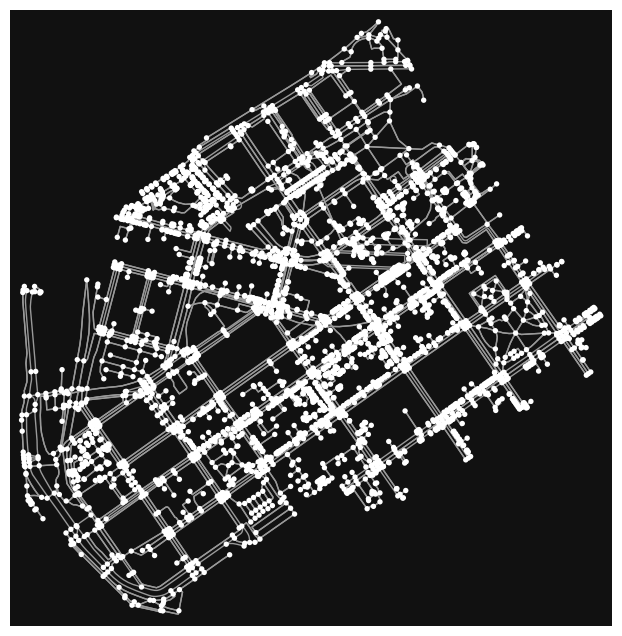

In [3]:
figure, ax = osmnx.plot_graph(graph)

Just as its GeoPandas and Pandas equivalents, `osmnx.plot_graph()` uses
matplotlib. The function returns a `(figure, axes)` tuple, that can be used to
modify the figure using all matplotlib functions we already got to know.

We can see that our graph contains nodes (the points) and edges (the
lines) that connects those nodes to each other.



### Convert a graph to `GeoDataFrame`s

The street network we just downloaded is a *graph*, more specifically a
`networkx.MultiDiGraph`. Its main purpose is to represent the topological
relationships between nodes and the links (edges) between them. Sometimes, it
is more convenient to have the underlying geodata in `geopandas.GeoDataFrame`s.
OSMnx comes with a convenient function that converts a graph into two geo-data
frames, one for nodes, and one for edges:
[`osmnx.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs).

In [4]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [5]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163663,24.921029,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [6]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed reversed  length  \
u        v          key                             
25216594 1372425721 0         40    False  10.404   
         1372425714 0         40    False  40.885   
25238874 336192701  0         40    False   6.101   
         1519889266 0         30    False  10.885   
25238883 568147264  0         40    False  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction width tunnel access service bridge  
u        v          key                                              
25216594 1372425721 0        NaN   NaN    NaN    NaN     NaN    NaN  
         1372425714 0        NaN   NaN    NaN    NaN     NaN    NaN  
25238874 336192701  0        NaN   NaN    NaN    NaN     NaN    NaN  
         1519889266 0        NaN   NaN    NaN    NaN     NaN    NaN  
25238883 568147264  0        NaN   NaN    NaN    NaN     NaN    NaN

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot
them using the same functions and tools as we have used before.



### Place polygon

Let’s also plot the polygon that represents our area of interest (Kamppi,
Helsinki). We can retrieve the polygon geometry using the
[osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf)
function.

In [7]:
# Get place boundary related to the place name as a geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

As the name of the function already tells us, it returns a GeoDataFrame object
based on the specified place name query.  Let’s still verify the data type:

In [8]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Let’s also have a look at the data:

In [9]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920643,180714888,relation,184714,60.167626,24.931709,boundary,administrative,20,0.430313,suburb,Kamppi,"Kamppi, Southern major district, Helsinki, Hel..."


<Axes: >

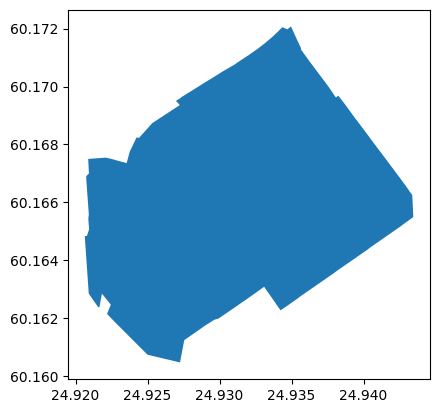

In [10]:
# Plot the area:
area.plot()

### Building footprints

Besides network data, OSMnx can also download any other data contained in the OpenStreetMap database. This includes, for instance, building footprints, and different points-of-interests (POIs). To download arbitrary geometries, filtered by [OSM tags](https://wiki.openstreetmap.org/wiki/Map_features) and a place name, use [`osmnx.features_from_place()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.features_from_place) [geometries is soon deprecated - Let's already use features instead]. The tag to retrieve all [buildings](https://wiki.openstreetmap.org/wiki/Buildings) is `building = yes`.

In [11]:
buildings = osmnx.features_from_place(
    PLACE_NAME,
    {"building": True},
)

In [12]:
len(buildings) 

454

In [13]:
buildings.head() 

ele  \
element_type osmid              
node         11711721042  NaN   
way          8035238      NaN   
             8042297      NaN   
             14797170     NaN   
             14797171     NaN   

                                                                   geometry  \
element_type osmid                                                            
node         11711721042                          POINT (24.92714 60.16420)   
way          8035238      POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297      POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170     POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171     POLYGON ((24.92390 60.16729, 24.92391 60.16731...   

                         amenity          operator wheelchair  source access  \
element_type osmid                                                             
node         11711721042     NaN      Nice Bike Oy        NaN     NaN    NaN   
way          8035238         NaN               NaN        NaN     NaN    NaN   
             8042297         NaN               NaN        NaN     NaN    NaN   
             14797170        NaN  City of Helsinki        NaN  survey    NaN   
             14797171        NaN               NaN        NaN  survey    NaN   

                         addr:housenumber      addr:street addr:unit  ...  \
element_type osmid                                                    ...   
node         11711721042               46      Eerikinkatu       NaN  ...   
way          8035238                22-24  Mannerheimintie       NaN  ...   
             8042297                    2   Runeberginkatu       NaN  ...   
             14797170                  10  Lapinlahdenkatu       NaN  ...   
             14797171                 NaN              NaN       NaN  ...   

                         lippakioski toilets:disposal unisex covered area  \
element_type osmid                                                          
node         11711721042         NaN              NaN    NaN     NaN  NaN   
way          8035238             NaN              NaN    NaN     NaN  NaN   
             8042297             NaN              NaN    NaN     NaN  NaN   
             14797170            NaN              NaN    NaN     NaN  NaN   
             14797171            NaN              NaN    NaN     NaN  NaN   

                         leisure ways type electrified nohousenumber  
element_type osmid                                                    
node         11711721042     NaN  NaN  NaN         NaN           NaN  
way          8035238         NaN  NaN  NaN         NaN           NaN  
             8042297         NaN  NaN  NaN         NaN           NaN  
             14797170        NaN  NaN  NaN         NaN           NaN  
             14797171        NaN  NaN  NaN         NaN           NaN  

[5 rows x 121 columns]

As you can see, there are several columns in `buildings`. Each column contains
information about a specific tag that OpenStreetMap contributors have added.
Each tag consists of a key (the column name), and a values (for example
`building=yes` or `building=school`). Read more about tags and tagging
practices in the [OpenStreetMap
wiki](https://wiki.openstreetmap.org/wiki/Tags).

In [14]:
buildings.columns 

Index(['ele', 'geometry', 'amenity', 'operator', 'wheelchair', 'source',
       'access', 'addr:housenumber', 'addr:street', 'addr:unit',
       ...
       'lippakioski', 'toilets:disposal', 'unisex', 'covered', 'area',
       'leisure', 'ways', 'type', 'electrified', 'nohousenumber'],
      dtype='object', length=121)

### Points-of-interest

Point-of-interest (POI) is a generic concept that describes point locations
that represent places of interest. As `osmnx.features_from_place()` can download any geometry data contained in the OpenStreetMap database, it can also be used to download any kind of POI data. [geometries is now deprecated]


In OpenStreetMap, many POIs are described using the [`amenity`
tag](https://wiki.openstreetmap.org/wiki/Key:amenity).  We can, for example,
retrieve all restaurant locations by querying `amenity=restaurant`.

In [15]:
restaurants = osmnx.features_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants) 

160

As we can see, there are quite many restaurants in the area.

Let’s explore what kind of attributes we have in our restaurants GeoDataFrame:

In [16]:
# Available columns
restaurants.columns.values 

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'payment:credit_cards', 'payment:debit_cards', 'phone',
       'website', 'wheelchair', 'geometry', 'email', 'facebook',
       'indoor_seating', 'level', 'opening_hours', 'outdoor_seating',
       'short_name', 'start_date', 'toilets:wheelchair', 'check_date',
       'delivery:covid19', 'opening_hours:covid19', 'takeaway:covid19',
       'diet:vegetarian', 'name:fi', 'name:zh', 'payment:cash',
       'diet:vegan', 'disused:amenity', 'addr:housename',
       'access:covid19', 'drive_through:covid19', 'takeaway', 'toilets',
       'contact:facebook', 'contact:phone', 'note',
       'opening_hours:brunch', 'source', 'contact:website', 'capacity',
       'smoking', 'dog', 'operator', 'shop', 'air_conditioning',
       'alt_name', 'internet_access', 'contact:email', 'established',
       'opening_hours:kitchen', 'description', 'die

As you can see, there is quite a lot of (potential) information related to the
amenities. Let’s subset the columns and inspect the data further. Can we
extract all restaurants’ names, address, and opening hours?

In [17]:
# Select some useful cols and print
interesting_columns = [
    "name",
    "opening_hours",
    "addr:city",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

# Print only selected cols
restaurants[interesting_columns].head(10) 

name  \
element_type osmid                                
node         60062502                    Kabuki   
             62965963   Restaurant & Bar Fusion   
             76617692              Johan Ludvig   
             76624339                   Shinobi   
             76624351                    Pueblo   
             151006260          Ravintola China   
             151006483                    Sekel   
             151006932               Haru Sushi   
             151007074                     Koto   
             248343226                  Mei Lin   

                                                            opening_hours  \
element_type osmid                                                          
node         60062502                                                 NaN   
             62965963                  Mo-Th 11-22; Fr-Sa 11-02; Su 12-20   
             76617692                                                 NaN   
             76624339                We-Th 17:00-23:00; Fr-Sa 16:00-24:00   
             76624351                                                 NaN   
             151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
             151006483                                                NaN   
             151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   
             151007074                                                NaN   
             248343226               Tu-Fr 11:00-21:30; Sa,Su 12:00-21:30   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         60062502   Helsinki           FI               12         00180   
             62965963        NaN          NaN              NaN           NaN   
             76617692   Helsinki           FI              NaN           NaN   
             76624339   Helsinki           FI               38         00120   
             76624351   Helsinki           FI              NaN           NaN   
             151006260  Helsinki           FI               25         00100   
             151006483  Helsinki           FI                7         00120   
             151006932  Helsinki           FI               30         00120   
             151007074  Helsinki           FI               22         00120   
             248343226  Helsinki           FI               29         00100   

                            addr:street  
element_type osmid                       
node         60062502   Lapinlahdenkatu  
             62965963               NaN  
             76617692               NaN  
             76624339      Albertinkatu  
             76624351       Eerikinkatu  
             151006260        Annankatu  
             151006483        Bulevardi  
             151006932    Fredrikinkatu  
             151007074    Lönnrotinkatu  
             248343226        Annankatu

:::{tip}
if some of the information needs an update, head over to [openstreetmap.org](https://openstreetmap.org) and edit the source data!
:::



### Parks and green areas

Let’s try to fetch all public parks in the Kamppi area. In OpenStreetMap,
[parks hould be tagged](https://wiki.openstreetmap.org/wiki/Map_features) as
`leisure = park`.  Smaller green areas (*puistikot*) are sometimes also tagged
`landuse = grass`. We can combine multiple tags in one data query.

In [18]:
parks = osmnx.features_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

In [19]:
parks.head()

geometry  \
element_type osmid                                                         
way          8042256   POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613   POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362  POLYGON ((24.92330 60.16499, 24.92323 60.16500...   
             15218739  POLYGON ((24.92741 60.16575, 24.92741 60.16574...   
             15223911  POLYGON ((24.93126 60.16589, 24.93075 60.16624...   

                       source access addr:city  \
element_type osmid                               
way          8042256      NaN    NaN       NaN   
             8042613      NaN    NaN       NaN   
             15218362  survey    NaN       NaN   
             15218739     NaN    NaN       NaN   
             15223911     NaN    NaN       NaN   

                                                                   nodes  \
element_type osmid                                                         
way          8042256   [292719496, 1001543836, 1037987967, 1001544060...   
             8042613   [552965718, 293390264, 295056669, 256264975, 1...   
             15218362  [150532954, 150532964, 150532958, 150532959, 2...   
             15218739  [1876856069, 1876856056, 1876856052, 187685606...   
             15223911  [1008235303, 1008235126, 1008235240, 100823522...   

                      leisure                     name  \
element_type osmid                                       
way          8042256     park  Pikkuparlamentin puisto   
             8042613     park           Simonpuistikko   
             15218362    park       Työmiehenpuistikko   
             15218739    park              Lastenlehto   
             15223911    park    Lapinlahden puistikko   

                                       name:fi                  name:sv  \
element_type osmid                                                        
way          8042256   Pikkuparlamentin puisto  Lilla parlamentets park   
             8042613            Simonpuistikko            Simonsskvären   
             15218362       Työmiehenpuistikko            Arbetarparken   
             15218739              Lastenlehto              Barnslunden   
             15223911    Lapinlahden puistikko          Lappviksskvären   

                      hoitoluokitus_viheralue   wikidata  \
element_type osmid                                         
way          8042256                      NaN        NaN   
             8042613                      NaN        NaN   
             15218362                      A2        NaN   
             15218739                      A2  Q18660505   
             15223911                      A2  Q18660481   

                               wikimedia_commons                 wikipedia  \
element_type osmid                                                           
way          8042256                         NaN                       NaN   
             8042613                         NaN                       NaN   
             15218362                        NaN                       NaN   
             15218739  Category:Lastenlehto Park            fi:Lastenlehto   
             15223911                        NaN  fi:Lapinlahden puistikko   

                      landuse alt_name loc_name name:en area ways type  
element_type osmid                                                      
way          8042256      NaN      NaN      NaN     NaN  NaN  NaN  NaN  
             8042613      NaN      NaN      NaN     NaN  NaN  NaN  NaN  
             15218362     NaN      NaN      NaN     NaN  NaN  NaN  NaN  
             15218739     NaN      NaN      NaN     NaN  NaN  NaN  NaN  
             15223911     NaN      NaN      NaN     NaN  NaN  NaN  NaN

<Axes: >

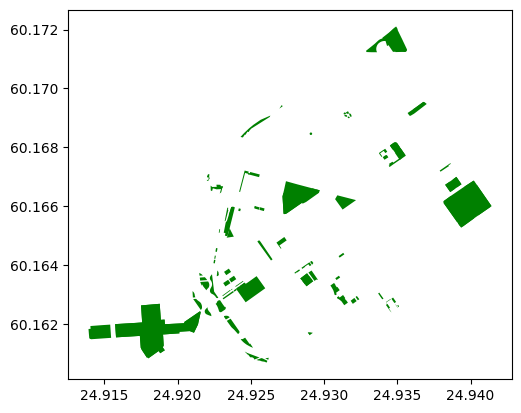

In [20]:
parks.plot(color="green") 

### Plotting the data

Let’s create a map out of the streets, buildings, restaurants, and the area polygon.

<Axes: >

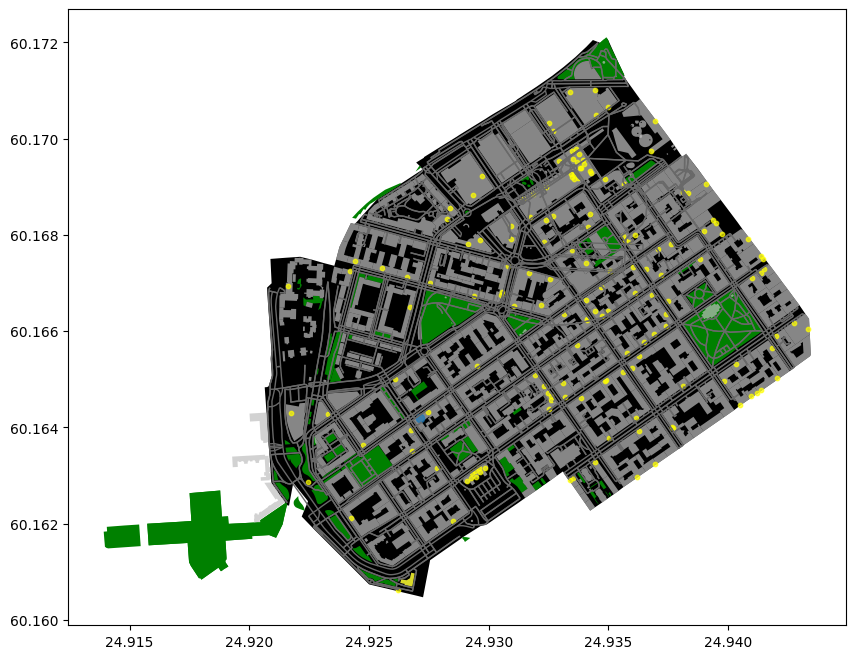

In [21]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

Cool! Now we have a map where we have plotted the restaurants, buildings,
streets and the boundaries of the selected region of ‘Kamppi’ in Helsinki. And
all of this required only a few lines of code. Pretty neat! 



:::{admonition} Check your understanding
:class: hint

Retrieve OpenStreetMap data from some other area! Download these elements using
OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to geo-data frame using
  `graph_to_gdfs()`
- Building footprints (and other geometries) using `features_from_place()`
  and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data
from the API!*


```{code}
# Specify the name that is used to seach for the data. Check that the place
# name is valid from https://nominatim.openstreetmap.org/ui/search.html
MY_PLACE = ""
```

```{code}
# Get street network
```

```{code}
# Get building footprints
```

```{code}
# Plot the data
```
:::


## Advanced reading

To analyse OpenStreetMap data over large areas, it is often more efficient and
meaningful to download the data all at once, instead of separate queries to the
API. Such data dumps from OpenStreetMap are available in various file formats,
OSM [Protocolbuffer Binary
Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of
them. Data extracts covering whole countries and continents are available, for
instance, at [download.geofabrik.de](https://download.geofabrik.de/).

[Pyrosm](https://pyrosm.readthedocs.io/) is a Python package for reading
OpenStreetMap data from PBF files into `geopandas.GeoDataFrames`. Pyrosm makes
it easy to extract road networks, buildings, Points of Interest (POI), landuse,
natural elements, administrative boundaries and much more - similar to OSMnx,
but taylored to analyses of large areas.  While OSMnx reads the data from the
Overpass API, pyrosm reads the data from a local PBF file.

Read more about fetching and using pbf files as a source for analysing
OpenStreetMap data in Python from the [pyrosm
documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).